In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

df = pd.read_csv("../data/fbref_PL_2024-25.csv")
df_filtered=df[df["Min"] >= 900]

df_filtered["Goals90"] = df_filtered["Gls"]/ (df_filtered["Min"]/ 90)
df_filtered["Ast90"] = df_filtered["Ast"]/ (df_filtered["Min"]/ 90)
df_filtered["xG90"] = df_filtered["xG"]  /(df_filtered["Min"]/ 90)

df_nonzero = df_filtered[(df_filtered["Goals90"] > 0) | (df_filtered["Ast90"] > 0)]

df_filtered.head()


/var/folders/wf/jr9cvn3x32gf3ccg9m_ssrn40000gn/T/ipykernel_2543/1303469407.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Goals90"] = df_filtered["Gls"]/ (df_filtered["Min"]/ 90)
/var/folders/wf/jr9cvn3x32gf3ccg9m_ssrn40000gn/T/ipykernel_2543/1303469407.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Ast90"] = df_filtered["Ast"]/ (df_filtered["Min"]/ 90)
/var/folders/wf/jr9cvn3x32gf3ccg9m_ssrn40000gn/T/ipykernel_2543/1303469407.py:11: SettingWithCopyWarning: 
A value is t

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Goals90,Ast90,xG90
2,3,Tyler Adams,us USA,MF,Bournemouth,25.0,1999.0,28,21,1965,...,0.00,0.14,0.07,0.05,0.12,0.07,0.12,0.000000,0.137405,0.073282
3,4,Tosin Adarabioyo,eng ENG,DF,Chelsea,26.0,1997.0,22,15,1409,...,0.06,0.13,0.06,0.01,0.07,0.06,0.07,0.063875,0.063875,0.057488
4,5,Simon Adingra,ci CIV,"FW,MF",Brighton,22.0,2002.0,29,12,1097,...,0.16,0.33,0.20,0.20,0.40,0.20,0.40,0.164084,0.164084,0.205105
5,6,Emmanuel Agbadou,ci CIV,DF,Wolves,27.0,1997.0,16,16,1410,...,0.06,0.06,0.05,0.02,0.07,0.05,0.07,0.063830,0.000000,0.051064
7,8,Ola Aina,ng NGA,DF,Nott'ham Forest,27.0,1996.0,35,35,2995,...,0.06,0.09,0.02,0.04,0.06,0.02,0.06,0.060100,0.030050,0.018030


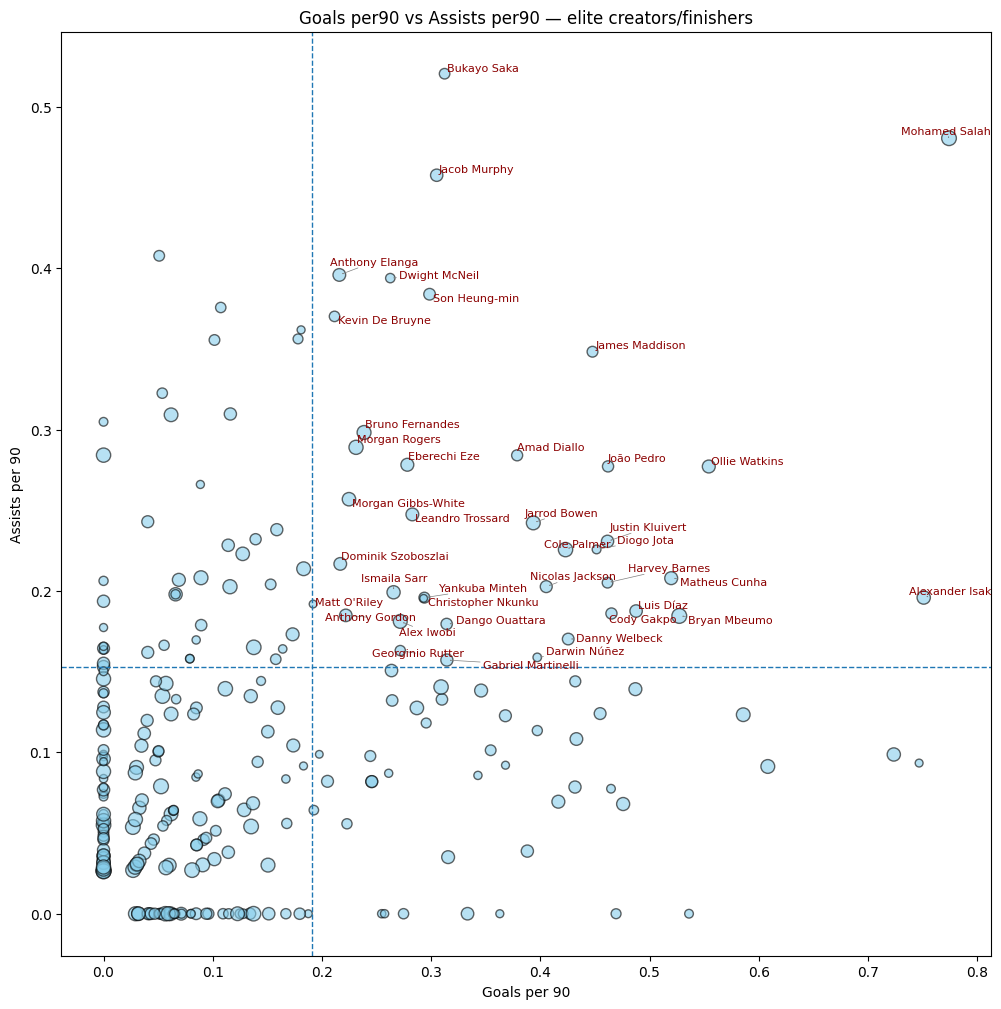

In [25]:
x_col, y_col = "Goals90", "Ast90"
top_pct = 0.70

x_thr = df_nonzero[x_col].quantile(top_pct)
y_thr = df_nonzero[y_col].quantile(top_pct)

plt.figure(figsize=(12,12))
plt.scatter(df_nonzero[x_col], df_nonzero[y_col],
            s=df_nonzero["Min"]/30, 
            c="skyblue", 
            edgecolor="k", 
            alpha=0.6)

plt.axvline(x_thr, linestyle="--", linewidth=1)
plt.axhline(y_thr, linestyle="--", linewidth=1)

texts =[]
for _, r in df_nonzero[(df_nonzero[x_col]>= x_thr) & (df_nonzero[y_col]>= y_thr)].iterrows():
    texts.append(plt.text(r[x_col], r[y_col],r["Player"], fontsize=8, color="darkred"))
adjust_text(texts, arrowprops=dict(arrowstyle="->", color="gray", lw=0.5))

plt.title("Goals per90 vs Assists per90 — elite creators/finishers")
plt.xlabel("Goals per 90")
plt.ylabel("Assists per 90")
plt.savefig("../figures/goals90_vs_ast90.png", dpi=300, bbox_inches="tight")
plt.show()